# Pledge의 비밀을 밝혀라!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from os import listdir
train_data_li = listdir('./train/')
train_data_li

import sys
mod = sys.modules[__name__]
for name in train_data_li:
    setattr(mod, name.split('.')[0], pd.read_csv('./train/' + name))
    
print(train_activity.shape, train_combat.shape, 
      train_pledge.shape, train_trade.shape, 
      train_payment.shape, train_label.shape)

(1601834, 17) (1574671, 13) (1083384, 15) (1849325, 11) (66432, 3) (40000, 3)


In [2]:
t = train_pledge.groupby(['acc_id', 'char_id', 'day'])['pledge_id'].count()
t = t[t > 1].reset_index()[['acc_id', 'char_id']]
li = sorted(list(set([(i,j) for i,j in t.values])))
change_server_label = train_label.set_index('acc_id').loc[list(set([i[0] for i in li]))]

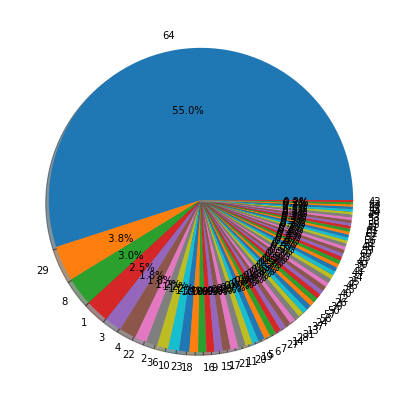

In [8]:
plt.figure(figsize=(10, 7), facecolor='w')
plt.pie(x=train_label['survival_time'].value_counts().values,
        labels=train_label['survival_time'].value_counts().index,
        shadow=True, autopct="%5.1f%%")
plt.show()

In [760]:
change_server_label.shape

(4454, 2)

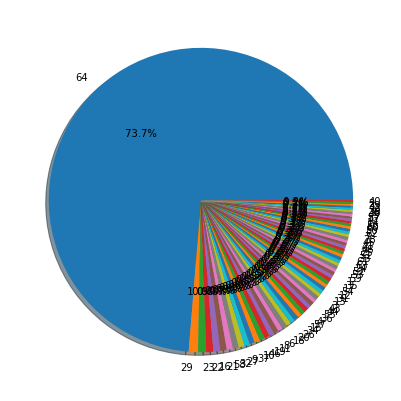

In [9]:
plt.figure(figsize=(10, 7), facecolor='w')
plt.pie(x=change_server_label['survival_time'].value_counts().values,
        labels=change_server_label['survival_time'].value_counts().index,
        shadow=True, autopct="%5.1f%%")
plt.show()

In [10]:
train_ds = train_payment.groupby(['acc_id'])['amount_spent'].sum()

In [11]:
labels = train_label.set_index('acc_id').loc[train_ds.index]

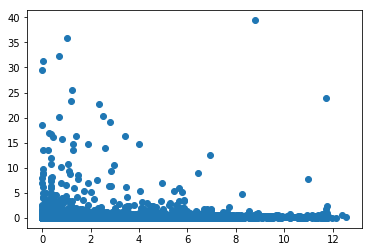

In [12]:
plt.scatter(train_ds.values, labels['amount_spent'].values)

In [13]:
p = pd.DataFrame(
    data=np.concatenate((train_ds.values.reshape(-1, 1), 
                         labels['amount_spent'].values.reshape(-1, 1),
                         np.where(labels['survival_time'].values == 64, 1, 0).reshape(-1, 1)), 
                        axis=1),
    columns=['daily_spent_28', 'daliy_spent_until_churn', 'survtime'])
p

,daily_spent_28,daliy_spent_until_churn,survtime
0,1.404644,0.020310,1.0
1,0.896531,0.052137,1.0
2,2.695461,0.184267,1.0
3,6.309749,0.517168,1.0
4,0.035204,0.000000,0.0
5,3.696431,0.356197,1.0
6,0.501072,0.017160,1.0
7,4.291380,0.416438,0.0
8,1.760205,0.067853,0.0
9,0.360255,0.033763,0.0


In [157]:
p = pd.merge(train_label, train_ds.reset_index(), on='acc_id', how='outer', suffixes=('_until_churn', '_total28')).fillna(0)
p['is_churn'] = np.where(p['survival_time'] != 64 , 1, 0)
p['total_spent'] = p['survival_time'] * p['amount_spent_until_churn']
p['survival_time'] = p['survival_time'].replace(64, 5)

In [158]:
p.head()

,acc_id,survival_time,amount_spent_until_churn,amount_spent_total28,is_churn,total_spent
0,27835,5,0.002559,0.873062,0,0.163793
1,12351,5,0.120154,0.528062,0,7.689860
2,125437,55,0.182593,1.815358,1,10.042642
3,104483,5,0.016241,0.371990,0,1.039454
4,4704,20,0.226396,1.404644,1,4.527925


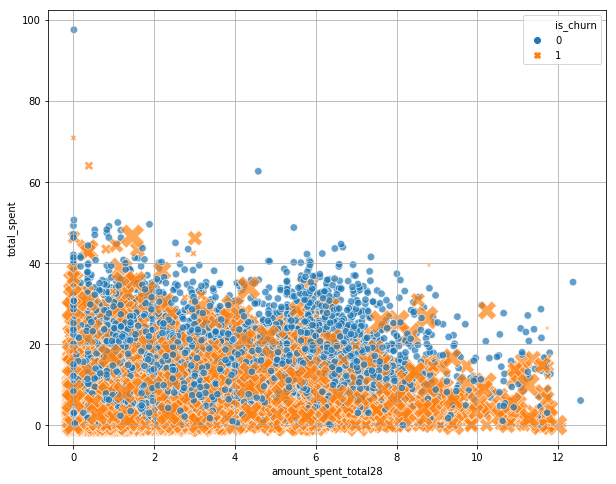

In [159]:
# Scatter plot by Groups
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x='amount_spent_total28', 
                y='total_spent', 
                hue='is_churn', # different colors by group
                style='is_churn', # different shapes by group
                s= p['survival_time'] * 10 + 5, # marker size
                alpha=.7,
                data=p)
plt.grid(True)
plt.show()

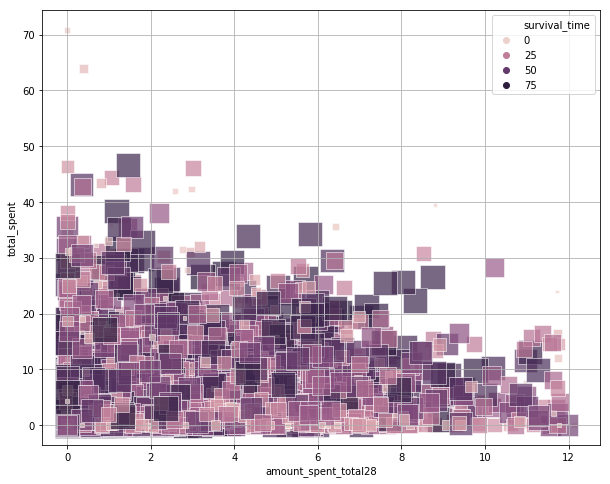

In [162]:
# Scatter plot by Groups
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x='amount_spent_total28', 
                y='total_spent', 
                hue='survival_time', # different colors by group
                s= p[p['is_churn'] == 1]['survival_time'] * 10 + 5, # marker size
                alpha=.7, marker='s',
                data=p[p['is_churn'] == 1])
plt.grid(True)
plt.show()

# 예측의 관건
1. 이탈 시기를 얼마나 정확하게 예측하느냐
2. 과금의 양을 얼마나 정확하게 예측하느냐

## 이번 예측 시도에는
1. Character별 접근을 시도

# 1. Total Spent 예측
- 이 해당 고객이 이탈(혹은 64동안)까지 얼마나 금액을 사용할 지 예측

### 예상되는 유효 변수들
1. Level 구간 - `train_combat`
2. 직업 - `train_combat`, `train_activity`, `train_trade`
3. 혈맹에서의 나의 performance - `train_pledge`, `train_combat`
4. 강화 스크롤 사용 - `train_activity`, `train_trade`

## 변수 생성

In [164]:
# 안씀

# Trade 전처리
train_trade['hour'] = train_trade['time'].map(lambda x : x.split(':')[0])
train_trade['minute'] = train_trade['time'].map(lambda x : x.split(':')[1])
train_trade['second'] = train_trade['time'].map(lambda x : x.split(':')[2])

train_trade = train_trade.sort_values(['day', 'hour', 'minute', 'second'])
train_trade = train_trade.drop('time', axis=1)

# # Trade 거래 내역 추출
# train_trade[train_trade['source_acc_id'] == train_trade['target_acc_id']] # 자기 캐릭으로 옮기는 지 여부
#                                                                           # 찍어보면 없는 것을 알 수 있음
# acc_id = train_label.acc_id.values # 사용할 40,000개의 train acc_id 추출
# # X : source_acc_id 총 모음, Y : target_acc_id 총 모음
# # A : X 중 acc_id와의 교집합, B : Y 중 acc_id와의 교집합  으로 정의
# trade_source_acc_id = train_trade[np.isin(train_trade['source_acc_id'].values, acc_id)] # A 계산
# trade_target_acc_id = train_trade[np.isin(train_trade['target_acc_id'].values, acc_id)] # B 계산

# # A 교집합 B 계산
# trade_all_acc_id = train_trade[np.logical_and(
#     np.isin(train_trade['source_acc_id'].values, acc_id),
#     np.isin(train_trade['target_acc_id'].values, acc_id))]

# # A-B를 계산하기 위해 논리식 연산
# source_gate = np.logical_and(
#     np.isin(train_trade['source_acc_id'].values, acc_id),
#     np.logical_xor(
#         np.isin(train_trade['source_acc_id'].values, acc_id),
#         np.isin(train_trade['target_acc_id'].values, acc_id)
#     )
# )
# # B-A를 계산하기 위해 논리식 연산
# target_gate = np.logical_and(
#     np.isin(train_trade['target_acc_id'].values, acc_id),
#     np.logical_xor(
#         np.isin(train_trade['target_acc_id'].values, acc_id),
#         np.isin(train_trade['source_acc_id'].values, acc_id)
#     )
# )

# trade_only_source_acc_id = train_trade[source_gate] # A-B 계산
# trade_only_target_acc_id = train_trade[target_gate] # B-A 계산

# # 개수 출력, 순서대로 A|B, A, B, A-B, B-A
# print(trade_all_acc_id.shape[0], trade_source_acc_id.shape[0], trade_target_acc_id.shape[0], trade_only_source_acc_id.shape[0], trade_only_target_acc_id.shape[0])

# # 위에서 만든 A|B(A>>B, A<<B), A-B, B-A 4개 X 거래 타입(type=0 or 1) 2개, 총 8개의 변수를 생성
# acc_char_source_t0 = trade_only_source_acc_id[trade_only_source_acc_id['type'] == 0].groupby(['source_acc_id', 'source_char_id'])['server'].count()
# acc_char_source_t0.index.names = ['acc_id', 'char_id']
# acc_char_source_t0.name = 'source2other_t0'

# acc_char_source_t1 = trade_only_source_acc_id[trade_only_source_acc_id['type'] == 1].groupby(['source_acc_id', 'source_char_id'])['server'].count()
# acc_char_source_t1.index.names = ['acc_id', 'char_id']
# acc_char_source_t1.name = 'source2other_t1'

# acc_char_target_t0 = trade_only_target_acc_id[trade_only_target_acc_id['type'] == 0].groupby(['target_acc_id', 'target_char_id'])['server'].count()
# acc_char_target_t0.index.names = ['acc_id', 'char_id']
# acc_char_target_t0.name = 'other2target_t0'

# acc_char_target_t1 = trade_only_target_acc_id[trade_only_target_acc_id['type'] == 1].groupby(['target_acc_id', 'target_char_id'])['server'].count()
# acc_char_target_t1.index.names = ['acc_id', 'char_id']
# acc_char_target_t1.name = 'other2target_t1'

# acc_char_source2_t0 = trade_all_acc_id[trade_all_acc_id['type'] == 0].groupby(['source_acc_id', 'source_char_id'])['server'].count()
# acc_char_source2_t0.index.names = ['acc_id', 'char_id']
# acc_char_source2_t0.name = 'source2label_t0'

# acc_char_source2_t1 = trade_all_acc_id[trade_all_acc_id['type'] == 1].groupby(['source_acc_id', 'source_char_id'])['server'].count()
# acc_char_source2_t1.index.names = ['acc_id', 'char_id']
# acc_char_source2_t1.name = 'source2label_t1'

# acc_char_target2_t0 = trade_all_acc_id[trade_all_acc_id['type'] == 0].groupby(['target_acc_id', 'target_char_id'])['server'].count()
# acc_char_target2_t0.index.names = ['acc_id', 'char_id']
# acc_char_target2_t0.name = 'label2target_t0'

# acc_char_target2_t1 = trade_all_acc_id[trade_all_acc_id['type'] == 1].groupby(['target_acc_id', 'target_char_id'])['server'].count()
# acc_char_target2_t1.index.names = ['acc_id', 'char_id']
# acc_char_target2_t1.name = 'label2target_t1'

834478 1403720 1280083 569242 445605


In [165]:
# combat에서 직업 추출
class_dict = {0 : '군주', 1 : '기사', 2 : '요정', 3 : '마법사', 4 : '다크엘프', 5 : '용기사', 6 : '환술사', 7 : '전사'}
acc_char_class = train_combat.groupby(['acc_id', 'char_id'])['class'].mean() # 클래스 변동이 없을 경우
acc_char_class = acc_char_class.map(lambda x : class_dict[x])

In [166]:
# activity에서 playtime 추출
acc_char_playtime = train_activity.groupby(['acc_id', 'char_id'])['playtime'].sum()

# activity에서 일별 접속 여부 추출
acc_char_attendant = train_activity.groupby(['acc_id', 'char_id', 'day'])['server'].count().unstack().applymap(lambda x : 1. if x >= 1. else 0).astype(np.uint8)
acc_char_attendant.columns = ['day' + str(col) for col in acc_char_attendant.columns]

In [914]:
del acc_char_info
acc_char_info = pd.concat(
            (acc_char_class,     # combat
             acc_char_playtime,  # activity
#              acc_char_source_t0,    # trade
#              acc_char_source_t1,
#              acc_char_target_t0,
#              acc_char_target_t1,
#              acc_char_source2_t0,
#              acc_char_source2_t1,
#              acc_char_target2_t0,
#              acc_char_target2_t1,
             acc_char_attendant  # activity : 출석
            ),   
          axis=1)
acc_char_info = pd.concat((acc_char_info, acc_char_attendant.sum(axis=1)), axis=1) # 총 출석일수 추가
acc_char_info = acc_char_info.rename(columns={0 : 'attend_day'})
acc_char_info['daily_playtime'] = acc_char_info['playtime'] / acc_char_info['attend_day']
acc_char_info.head()

class   playtime  day1  day2  day3  day4  day5  day6  day7  \
acc_id char_id                                                              
2      233598     기사  91.533663     1     1     1     1     1     1     1   
5      22260      요정   0.046813     0     0     0     0     0     0     0   
       175813     요정   0.011703     0     0     0     0     0     0     0   
       321231     요정   6.057616     0     0     0     0     0     0     0   
8      43437     용기사   0.798163     1     0     1     1     0     1     1   

                day8       ...        day21  day22  day23  day24  day25  \
acc_id char_id             ...                                            
2      233598      1       ...            1      1      1      1      1   
5      22260       0       ...            0      1      1      1      0   
       175813      0       ...            0      1      1      1      0   
       321231      0       ...            0      1      1      1      1   
8      43437       1       ...            1      1      0      1      0   

                day26  day27  day28  attend_day  daily_playtime  
acc_id char_id                                                   
2      233598       1      1      1          28        3.269059  
5      22260        1      1      0           5        0.009363  
       175813       0      0      0           3        0.003901  
       321231       1      1      1          10        0.605762  
8      43437        0      0      1          16        0.049885  

[5 rows x 32 columns]

In [915]:
acc_char_info.shape

(152483, 32)

### 위에 추가할 수 있는 변수
- pledge
    1. 혈맹에 들어있는가
    2. ~~몇 위 혈맹에 들어있는가~~
        - 혈맹의 활동과 나의 활동 비교 ; 유저의 적극성 반영
        - 혈맹의 객관적 수치 반영 : 혈맹원 수, 평균 싸움 횟수
        - 혈맹 이동
    3. 들어있는 혈맹의 특성은 어떠한가
- activity
    1. 일별 활동 통계는 어떠한가
    2. 28일 종합 통계는 어떠한가
    3. death와 revive, exp_recovery 관계는 어떠한가
    4. playtime과 fishing, private_shop 운영 시간은 어떠한가
    5. 기존 baseline에서 유용한 변수로 지목받은 game_money_change를 어떻게 살릴 수 있는가
    6. 일일 경험치, 시간변수들로 하루 활동을 어떻게 보내는지 파악
    7. server를 옮겨다니며 플레이하는가
- combat & activity
    1. 활동 시간 및 통계량에 비해 level 증가 추세 (게임의 활력 부여)
    2. 고레벨의 유저와 레벨업하는 유저, 혹은 그 외의 category 분리
    3. 전투 활동을 포함하여 activity의 6.을 같이 파악
- combat & trade
    1. 직업별로 알맞은 무기와 방어구, 악세사리를 사는가
    2. 어떤 직업이 장사꾼으로 많은가
- activity & trade
    1. private_shop 운영과 거래 가운데 어떠한 현상이 발생하는가
    2. enchant_scroll을 구입하고 enchant_count가 증가하는가
        - 위의 행동을 취한 후에 실제로 캐릭터 성적이 올랐는가
    3. game_money_change랑 엮어서 접는 사람을 확실하게 파악해야 한다! - churn 예측

### 내 현금으로 게임머니를 살 때
- game money가 확 증가할 때
    1. 제대로 시작하려고
    2. 접으려고
    
### 예상되는 유효 변수들
1. Level 구간 - `train_combat`
2. 직업 - `train_combat`, `train_activity`, `train_trade`
3. 혈맹에서의 나의 performance - `train_pledge`, `train_combat`
4. 강화 스크롤 사용 - `train_activity`, `train_trade`

In [916]:
# level
t = train_combat.groupby(['acc_id', 'char_id', 'day', 'server']).agg({'level' : 'first'})
t = t.groupby(level=[0,1,2]).head(1)
t = t.reset_index().groupby(['acc_id', 'char_id']).agg({'level' : ['count', 'first', 'last', 'mean', 'max']})

level_variation = t[('level', 'last')] - t[('level', 'first')]

acc_char_info = pd.concat((acc_char_info, level_variation), axis=1)
acc_char_info = acc_char_info.rename(columns={0 : 'level_variation'})

In [917]:
level_mean = t[('level', 'mean')]
level_mean.name = 'level_mean'
acc_char_info = pd.concat((acc_char_info, level_mean), axis=1)

In [988]:
level_max = t[('level', 'max')]
level_max.name = 'level_max'
acc_char_info = pd.concat((acc_char_info, level_max), axis=1)

In [918]:
train_activity.columns

Index(['day', 'acc_id', 'char_id', 'server', 'playtime', 'npc_kill',
       'solo_exp', 'party_exp', 'quest_exp', 'rich_monster', 'death', 'revive',
       'exp_recovery', 'fishing', 'private_shop', 'game_money_change',
       'enchant_count'],
      dtype='object')

In [919]:
act_death = train_activity.groupby(['acc_id', 'char_id', 'day'])[['death', 'revive', 'exp_recovery']].mean()

In [920]:
act_death['exp_recovery'][act_death['exp_recovery'] > 0].value_counts().sort_index()

5.316244       14
7.974367      146
10.632489       1
15.948733    5069
31.897467     180
47.846200      21
63.794933       5
79.743666       5
Name: exp_recovery, dtype: int64

In [921]:
act_is_revive = act_death['revive'] - act_death['death']
act_is_revive = act_is_revive.unstack().fillna(0)
act_is_revive_ewm5 = act_is_revive.T.ewm(span=5).mean().T

act_is_revive.columns = ['is_revive' + str(col) for col in act_is_revive.columns]
act_is_revive_ewm5.columns = [str(col) + '_ewm5' for col in act_is_revive.columns]

acc_char_info = pd.concat((acc_char_info, act_is_revive), axis=1)
acc_char_info = pd.concat((acc_char_info, act_is_revive_ewm5), axis=1)

In [922]:
act_time = train_activity.groupby(['acc_id', 'char_id', 'day'])[['playtime', 'fishing', 'private_shop']].mean()

In [923]:
act_time[act_time['playtime'] <= act_time['private_shop']]

playtime   fishing  private_shop
acc_id char_id day                                  
65     270517  4    0.851998  0.000000      0.856758
       387120  3    0.213000  0.000000      0.216433
172    277012  21   2.673028  0.000000      2.675915
               22   3.302665  0.000000      3.308048
               23   2.527908  0.000000      2.533057
               24   3.150522  0.000000      3.164839
207    48055   9    0.575801  0.000000      0.576620
287    71884   21   0.000000  3.370544      0.000000
               23   0.000000  3.370544      0.000000
               24   0.000000  3.370544      0.000000
               26   0.000000  3.370544      0.000000
               27   0.000000  3.370544      0.000000
               28   0.000000  3.370505      0.000000
371    205199  19   0.000000  3.370544      0.000000
               20   0.000000  3.370544      0.000000
               21   0.000000  3.370544      0.000000
               24   0.000000  3.370544      0.000000
               26   0.000000  3.370544      0.000000
               27   0.000000  3.370544      0.000000
               28   0.000000  3.370505      0.000000
556    117529  26   0.000000  3.370544      0.000000
               27   0.000000  3.370544      0.000000
598    6444    3    3.370544  0.000000      3.370544
               4    3.370544  0.000000      3.370544
               6    3.370544  0.000000      3.370544
               8    2.717501  0.000000      2.722338
               9    3.342456  0.000000      3.367462
               10   3.356500  0.000000      3.368476
               13   3.370544  0.000000      3.370544
               15   2.258732  0.000000      2.260566
...                      ...       ...           ...
130010 206661  6    3.370544  0.000000      3.370544
130027 295299  15   0.000000  3.370544      0.000000
               16   0.000000  3.370544      0.000000
               17   0.000000  3.370544      0.000000
               20   0.000000  3.370544      0.000000
               21   0.000000  3.370544      0.000000
               22   0.000000  3.370544      0.000000
               23   0.000000  3.370544      0.000000
               24   0.000000  3.370544      0.000000
               25   0.000000  3.370544      0.000000
               27   0.000000  3.370544      0.000000
               28   0.000000  3.370505      0.000000
130070 19949   27   0.000000  3.370544      0.000000
130095 260271  10   3.365862  0.000000      3.368359
130135 17794   21   2.670688  0.000000      2.674355
               23   1.837414  0.000000      1.843344
               24   3.276917  0.000000      3.288699
130251 328980  5    0.828592  0.000000      0.830425
               7    2.460029  0.000000      2.460146
130312 273588  19   0.000000  3.370544      0.000000
               23   0.000000  3.370544      0.000000
               24   0.000000  3.370544      0.000000
               25   0.000000  3.370544      0.000000
               26   0.000000  3.370544      0.000000
               27   0.000000  3.370544      0.000000
               28   0.000000  3.370505      0.000000
130469 377725  18   0.000000  3.370544      0.000000
               19   0.000000  3.370544      0.000000
               22   0.000000  3.370544      0.000000
               23   0.000000  3.370544      0.000000

[11218 rows x 3 columns]

In [927]:
act_time = train_activity.groupby(['acc_id', 'char_id', 'day'])[['playtime', 'fishing', 'private_shop']].mean()
act_time = act_time.unstack().fillna(0)
act_time_ewm5 = pd.concat(
    (act_time['playtime'].T.ewm(span=5).mean().T, 
     act_time['fishing'].T.ewm(span=5).mean().T, 
     act_time['private_shop'].T.ewm(span=5).mean().T),
    axis=1)
act_time.columns = [col[0] + str(col[1]) for col in act_time.columns]
act_time_ewm5.columns = [col + '_' + str(k) + '_ewm5' for col in ['playtime', 'fishing', 'private_shop'] for k in range(1, 29)]

In [928]:
act_time.head()

playtime                                                    \
day                   1         2         3         4         5         6    
acc_id char_id                                                               
2      233598   2.703457  3.363522  3.370544  3.370544  3.370544  3.370544   
5      22260    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
       175813   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
       321231   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8      43437    0.002341  0.000000  0.004681  0.004681  0.000000  0.004681   

                                                          ...    private_shop  \
day                   7         8         9         10    ...              19   
acc_id char_id                                            ...                   
2      233598   3.370544  2.768995  3.361181  3.370544    ...        3.132733   
5      22260    0.000000  0.000000  0.000000  0.000000    ...        0.000000   
       175813   0.000000  0.000000  0.000000  0.000000    ...        0.000000   
       321231   0.000000  0.000000  0.376845  0.000000    ...        0.000000   
8      43437    0.004681  0.009363  0.002341  0.002341    ...        0.000000   

                                                                           \
day                   20        21       22        23        24        25   
acc_id char_id                                                              
2      233598   3.135776  3.062357  3.13679  2.529546  3.135971  3.130509   
5      22260    0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
       175813   0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
       321231   0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
8      43437    0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   

                                             
day                   26       27        28  
acc_id char_id                               
2      233598   3.135464  3.13363  3.134176  
5      22260    0.000000  0.00000  0.000000  
       175813   0.000000  0.00000  0.000000  
       321231   0.000000  0.00000  0.000000  
8      43437    0.000000  0.00000  0.000000  

[5 rows x 84 columns]

In [929]:
act_time_ewm5.head()

playtime_1_ewm5  playtime_2_ewm5  playtime_3_ewm5  \
acc_id char_id                                                      
2      233598          2.703457         3.099496         3.227887   
5      22260           0.000000         0.000000         0.000000   
       175813          0.000000         0.000000         0.000000   
       321231          0.000000         0.000000         0.000000   
8      43437           0.002341         0.000936         0.002710   

                playtime_4_ewm5  playtime_5_ewm5  playtime_6_ewm5  \
acc_id char_id                                                      
2      233598          3.287144         3.319160         3.337936   
5      22260           0.000000         0.000000         0.000000   
       175813          0.000000         0.000000         0.000000   
       321231          0.000000         0.000000         0.000000   
8      43437           0.003529         0.002174         0.003090   

                playtime_7_ewm5  playtime_8_ewm5  playtime_9_ewm5  \
acc_id char_id                                                      
2      233598          3.349481         3.148129         3.221043   
5      22260           0.000000         0.000000         0.000000   
       175813          0.000000         0.000000         0.000000   
       321231          0.000000         0.000000         0.128970   
8      43437           0.003654         0.005634         0.004507   

                playtime_10_ewm5          ...           private_shop_19_ewm5  \
acc_id char_id                            ...                                  
2      233598           3.271756          ...                        3.06383   
5      22260            0.000000          ...                        0.00000   
       175813           0.000000          ...                        0.00000   
       321231           0.085221          ...                        0.00000   
8      43437            0.003772          ...                        0.00000   

                private_shop_20_ewm5  private_shop_21_ewm5  \
acc_id char_id                                               
2      233598               3.087819               3.07933   
5      22260                0.000000               0.00000   
       175813               0.000000               0.00000   
       321231               0.000000               0.00000   
8      43437                0.000000               0.00000   

                private_shop_22_ewm5  private_shop_23_ewm5  \
acc_id char_id                                               
2      233598               3.098486              2.908822   
5      22260                0.000000              0.000000   
       175813               0.000000              0.000000   
       321231               0.000000              0.000000   
8      43437                0.000000              0.000000   

                private_shop_24_ewm5  private_shop_25_ewm5  \
acc_id char_id                                               
2      233598               2.984543                3.0332   
5      22260                0.000000                0.0000   
       175813               0.000000                0.0000   
       321231               0.000000                0.0000   
8      43437                0.000000                0.0000   

                private_shop_26_ewm5  private_shop_27_ewm5  \
acc_id char_id                                               
2      233598               3.067289              3.089403   
5      22260                0.000000              0.000000   
       175813               0.000000              0.000000   
       321231               0.000000              0.000000   
8      43437                0.000000              0.000000   

                private_shop_28_ewm5  
acc_id char_id                        
2      233598               3.104328  
5      22260                0.000000  
       175813               0.000000  
       321231               0.000000  
8      43437                0

In [933]:
acc_char_info = pd.concat((acc_char_info, act_time), axis=1)
acc_char_info = pd.concat((acc_char_info, act_time_ewm5), axis=1)

In [934]:
acc_char_info.head()

class   playtime  day1  day2  day3  day4  day5  day6  day7  \
acc_id char_id                                                              
2      233598     기사  91.533663     1     1     1     1     1     1     1   
5      22260      요정   0.046813     0     0     0     0     0     0     0   
       175813     요정   0.011703     0     0     0     0     0     0     0   
       321231     요정   6.057616     0     0     0     0     0     0     0   
8      43437     용기사   0.798163     1     0     1     1     0     1     1   

                day8          ...           private_shop_19_ewm5  \
acc_id char_id                ...                                  
2      233598      1          ...                        3.06383   
5      22260       0          ...                        0.00000   
       175813      0          ...                        0.00000   
       321231      0          ...                        0.00000   
8      43437       1          ...                        0.00000   

                private_shop_20_ewm5  private_shop_21_ewm5  \
acc_id char_id                                               
2      233598               3.087819               3.07933   
5      22260                0.000000               0.00000   
       175813               0.000000               0.00000   
       321231               0.000000               0.00000   
8      43437                0.000000               0.00000   

                private_shop_22_ewm5  private_shop_23_ewm5  \
acc_id char_id                                               
2      233598               3.098486              2.908822   
5      22260                0.000000              0.000000   
       175813               0.000000              0.000000   
       321231               0.000000              0.000000   
8      43437                0.000000              0.000000   

                private_shop_24_ewm5  private_shop_25_ewm5  \
acc_id char_id                                               
2      233598               2.984543                3.0332   
5      22260                0.000000                0.0000   
       175813               0.000000                0.0000   
       321231               0.000000                0.0000   
8      43437                0.000000                0.0000   

                private_shop_26_ewm5  private_shop_27_ewm5  \
acc_id char_id                                               
2      233598               3.067289              3.089403   
5      22260                0.000000              0.000000   
       175813               0.000000              0.000000   
       321231               0.000000              0.000000   
8      43437                0.000000              0.000000   

                private_shop_28_ewm5  
acc_id char_id                        
2      233598               3.104328  
5      22260                0.000000  
       175813               0.000000  
       321231               0.000000  
8      43437                0.000000  

[5 rows x 258 columns]

In [937]:
act_exp = train_activity.groupby(['acc_id', 'char_id', 'day'])[['solo_exp', 'party_exp', 'quest_exp', 'rich_monster']].mean()

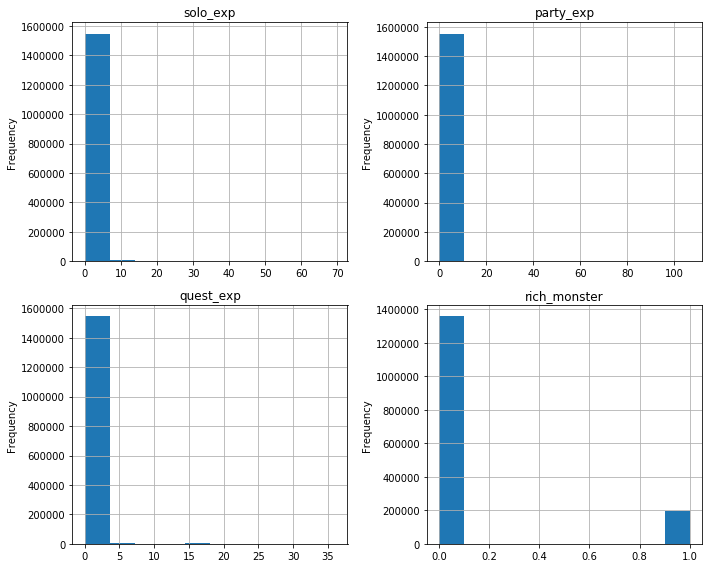

In [951]:
fig = plt.figure(figsize=(10, 8), facecolor='w')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

act_exp['solo_exp'].plot.hist(ax=ax1, grid=True)
act_exp['party_exp'].plot.hist(ax=ax2, grid=True)
act_exp['quest_exp'].plot.hist(ax=ax3, grid=True)
act_exp['rich_monster'].map(lambda x : 1 if x > 0 else 0).plot.hist(ax=ax4, grid=True)

ax1.set_title('solo_exp')
ax2.set_title('party_exp')
ax3.set_title('quest_exp')
ax4.set_title('rich_monster')

plt.tight_layout()
plt.show()

In [976]:
act_rich_monster = act_exp['rich_monster'].map(lambda x : 1 if x > 0 else 0).unstack().sum(axis=1)
act_exp_sum = act_exp[['solo_exp', 'party_exp', 'quest_exp']].unstack().sum(axis=1)

act_rich_monster.name = 'touch_boss'
act_exp_sum.name = 'sum_exp_28'

act_exp_daily_ewm5 = act_exp[['solo_exp', 'party_exp', 'quest_exp']].sum(axis=1).unstack().fillna(0).T.ewm(span=5).mean().T
act_exp_daily_ewm5.columns = ['exp_' + str(i) + '_ewm5' for i in act_exp_daily_ewm5.columns]

acc_char_info = pd.concat((acc_char_info, act_rich_monster), axis=1)
acc_char_info = pd.concat((acc_char_info, act_exp_sum), axis=1)
acc_char_info = pd.concat((acc_char_info, act_exp_daily_ewm5), axis=1)

In [980]:
acc_char_info.shape

(152483, 288)

In [1028]:
f = lambda x : x.ewm(span=6).mean()
combat_cnt = train_combat.groupby(['acc_id', 'char_id', 'day']).agg({
    'random_attacker_cnt' : 'mean',
    'random_defender_cnt' : 'mean',
    'temp_cnt' : 'mean',
    'etc_cnt' : 'mean',
    'num_opponent' : 'mean',
}).unstack().fillna(0).T.groupby(level=0).apply(f)

In [1033]:
combat_cnt = combat_cnt[6::7].T

In [1040]:
combat_cnt.columns = [col[0] + str(col[1]) + 'ewm7' for col in combat_cnt.columns]

In [1042]:
acc_char_info = pd.concat((acc_char_info, combat_cnt), axis=1)

In [1077]:
trade_sell_item = train_trade.groupby(['source_acc_id', 'source_char_id', 'item_type'])['server'].count().unstack().fillna(0)
trade_sell_item.index.names = ['acc_id', 'char_id']
trade_sell_item.columns = ['sell_' + col for col in trade_sell_item.columns]
trade_sell_item = trade_sell_item.loc[acc_char_playtime.index]

trade_buy_item = train_trade.groupby(['target_acc_id', 'target_char_id', 'item_type'])['server'].count().unstack().fillna(0)
trade_buy_item.index.names = ['acc_id', 'char_id']
trade_buy_item.columns = ['buy_' + col for col in trade_buy_item.columns]
trade_buy_item = trade_buy_item.loc[acc_char_playtime.index]

trade_st_01 = pd.concat((
    acc_char_source_t0,    # trade
     acc_char_source_t1,
     acc_char_target_t0,
     acc_char_target_t1,
     acc_char_source2_t0,
     acc_char_source2_t1,
     acc_char_target2_t0,
     acc_char_target2_t1,
), axis=1).fillna(0)

In [1069]:
acc_char_info = pd.concat((acc_char_info, trade_sell_item, trade_buy_item, trade_st_01), axis=1)

In [1102]:
acc_char_info.head()

class   playtime  day1  day2  day3  day4  day5  day6  day7  \
acc_id char_id                                                              
2      233598     기사  91.533663   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
5      22260      요정   0.046813   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
       175813     요정   0.011703   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
       321231     요정   6.057616   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
8      43437     용기사   0.798163   1.0   0.0   1.0   1.0   0.0   1.0   1.0   

                day8       ...         buy_spell  buy_weapon  source2other_t0  \
acc_id char_id             ...                                                  
2      233598    1.0       ...               0.0         0.0             13.0   
5      22260     0.0       ...               NaN         NaN              NaN   
       175813    0.0       ...               NaN         NaN              NaN   
       321231    0.0       ...               0.0         0.0              0.0   
8      43437     1.0       ...               NaN         NaN              NaN   

                source2other_t1  other2target_t0  other2target_t1  \
acc_id char_id                                                      
2      233598               0.0              0.0              0.0   
5      22260                NaN              NaN              NaN   
       175813               NaN              NaN              NaN   
       321231               0.0              0.0              0.0   
8      43437                NaN              NaN              NaN   

                source2label_t0  source2label_t1  label2target_t0  \
acc_id char_id                                                      
2      233598              21.0              1.0              1.0   
5      22260                NaN              NaN              NaN   
       175813               NaN              NaN              NaN   
       321231               0.0              0.0             10.0   
8      43437                NaN              NaN              NaN   

                label2target_t1  
acc_id char_id                   
2      233598               0.0  
5      22260                NaN  
       175813               NaN  
       321231               0.0  
8      43437                NaN  

[5 rows x 331 columns]

In [1091]:
is_merchant = (train_activity['npc_kill'] == 0) & \
                (train_activity['solo_exp'] == 0) & \
                (train_activity['party_exp'] == 0) & \
                (train_activity['quest_exp'] == 0) & \
                (train_activity['rich_monster'] == 0) & \
                (train_activity['death'] == 0) & \
                (train_activity['revive'] == 0) & \
                (train_activity['exp_recovery'] == 0) & \
                (train_activity['fishing'] == 0) & \
                (train_activity['private_shop'] > 0)

In [1095]:
train_activity['merchant_private_shop'] = np.where(is_merchant.values, train_activity['private_shop'].values, 0)

In [1097]:
act_merchant = train_activity.groupby(['acc_id', 'char_id'])['merchant_private_shop'].sum()
act_merchant.name = 'is_merchant'

In [1104]:
acc_char_info = pd.concat((acc_char_info, act_merchant), axis=1)

In [1113]:
acc_char_info[~acc_char_info['class'].isnull()].reset_index().acc_id.nunique()

40000

In [1114]:
acc_char_info = acc_char_info[~acc_char_info['class'].isnull()]

In [1139]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()

cat_class = onehot.fit_transform(acc_char_info['class'].values.reshape(-1, 1)).toarray()
cat_class = pd.DataFrame(data=cat_class, index=acc_char_info.index,
             columns=['class_' + i for i in ['0', '1', '4', '3', '2', '5', '7', '6']])[['class_' + str(col) for col in range(0, 8)]]

In [1142]:
acc_char_info = pd.concat((acc_char_info, cat_class), axis=1)
del acc_char_info['class']
del acc_char_info['playtime']

In [1213]:
acc_char_info.to_csv('acc_char_info.csv')

In [1214]:
import gc
gc.collect()

300217

In [ ]:
act_game_money = train_activity.groupby(['acc_id', 'char_id', 'day'])['game_money_change'].sum()
act_game_money = act_game_money.unstack().fillna(0)

In [1232]:
acc_char_info.shape

(149851, 338)

In [1227]:
act_gm_change3 = act_game_money.T.rolling(window=3).sum().dropna()[::3].T
act_gm_change7 = act_game_money.T.rolling(window=7).sum().dropna()[::7].T
act_gm_change14 = act_game_money.T.rolling(window=14).sum().dropna()[::14].T

act_game_money.columns = ['game_money_change' + str(col) for col in act_game_money.columns]
act_gm_change3.columns = ['sum3_game_money_change' + str(col) for col in act_gm_change3.columns]
act_gm_change7.columns = ['sum7_game_money_change' + str(col) for col in act_gm_change7.columns]
act_gm_change14.columns = ['sum14_game_money_change' + str(col) for col in act_gm_change14.columns]

In [1230]:
gc.collect()

466

In [1231]:
acc_char_info = pd.concat((acc_char_info, act_game_money, act_gm_change3, act_gm_change7, act_gm_change14), axis=1)

MemoryError: 

# 유저 10명 작정하고 파기
1. acc_id : 8
    - char_id : 207949, 305373, 320423,  43437,  71899, 257304, 126227
2. acc_id : 130470
    - char_id : 364642, 232514, 249099, 246180, 183188, 236559, 196278
3. acc_id : 50
    - char_id : 78995
4. acc_id : 102496
    - char_id : 229689,  60154, 326637, 178176,   9953, 164718, 232258, 357917,
       277740, 231924,   3027, 218662, 315496, 140027, 396244, 213540,
       119818, 142729, 375709, 320159

In [436]:
train_label.sort_values('amount_spent', ascending=False)

,acc_id,survival_time,amount_spent
23912,102496,1,39.412632
13903,30688,1,35.949426
30498,79872,1,32.214971
27235,65542,1,31.252524
7315,94454,1,29.529944
3286,94284,1,25.439489
23711,24702,1,23.952066
14583,82903,3,23.623955
18382,30371,1,23.395361
23051,50670,1,22.813785


In [437]:
acc_id_ = 102496

In [438]:
train_label[train_label['acc_id'] == acc_id_]

,acc_id,survival_time,amount_spent
23912,102496,1,39.412632


In [624]:
q = train_activity[train_activity['acc_id'] == acc_id_].char_id.unique()

In [441]:
train_activity[train_activity['acc_id'] == acc_id_].char_id.unique()

array([229689,  60154, 326637, 178176,   9953, 164718, 232258, 357917,
       277740, 231924,   3027, 218662, 315496, 140027, 396244, 213540,
       119818, 142729, 375709, 320159], dtype=int64)

In [442]:
train_payment[train_payment['acc_id'] == acc_id_]

,day,acc_id,amount_spent
48391,1,102496,8.801026


In [443]:
train_activity[train_activity['acc_id'] == acc_id_]['enchant_count'].mean()

0.0

In [625]:
ix = 0
char_id_ = train_activity[train_activity['acc_id'] == acc_id_].char_id.unique()[ix]

In [626]:
train_combat[(train_combat['acc_id'] == acc_id_) & (train_combat['char_id'] == char_id_)].shape[0]

3

In [627]:
train_combat[(train_combat['acc_id'] == acc_id_) & (train_combat['char_id'] == char_id_)].sort_values('day')

,day,acc_id,char_id,server,class,level,pledge_cnt,random_attacker_cnt,random_defender_cnt,temp_cnt,same_pledge_cnt,etc_cnt,num_opponent
1441678,1,102496,229689,ay,6,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1446327,2,102496,229689,ay,6,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1451196,11,102496,229689,ay,6,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [628]:
train_activity[(train_activity['acc_id'] == acc_id_) & (train_activity['char_id'] == char_id_)]['private_shop'].sum()

0.0

In [638]:
6e-2

0.06

In [629]:
train_activity[(train_activity['acc_id'] == acc_id_) & (train_activity['char_id'] == char_id_)].sort_values('day')

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,rich_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
43991,1,102496,229689,ay,0.037450,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,-0.000006,0.0
98037,2,102496,229689,ay,0.023407,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,-0.000003,0.0
599011,11,102496,229689,ay,0.004681,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,-0.004546,0.0


In [639]:
train_pledge[(train_pledge['acc_id'] == acc_id_) & (train_pledge['char_id'] == char_id_)].sort_values('day')

,day,acc_id,char_id,server,pledge_id,play_char_cnt,combat_char_cnt,pledge_combat_cnt,random_attacker_cnt,random_defender_cnt,same_pledge_cnt,temp_cnt,etc_cnt,combat_play_time,non_combat_play_time


In [621]:
i = 4368
print(len(rank_pledge))
print(num_pledge.loc[i])
rank_pledge.loc[i]

21857
0.2887145548040357


0    11300.0
1    11686.0
Name: 4368, dtype: float64

In [640]:
train_trade[(train_trade['source_acc_id'] == acc_id_) & (train_trade['source_char_id'] == char_id_)].sort_values('day')

,day,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price,hour,minute,second
273375,1,1,ay,102496,229689,92093,161600,adena,2.396984e+00,NaN,21,02,20
308805,1,1,ay,102496,229689,56230,25118,adena,8.389444e+00,NaN,21,07,33
71526,2,1,ay,102496,229689,56230,25118,armor,2.396984e-08,NaN,18,34,30


In [641]:
train_trade[(train_trade['target_acc_id'] == acc_id_) & (train_trade['target_char_id'] == char_id_)].sort_values('day')

,day,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price,hour,minute,second
250370,1,1,ay,56230,25118,102496,229689,armor,2.396984e-08,NaN,21,07,33


In [659]:
train_trade.shape

(1849325, 13)

In [677]:
train_trade.loc[tt.index].sort_values(['day', 'hour', 'minute', 'second'])['item_type'].value_counts()

etc               212451
adena              91992
enchant_scroll     65465
armor              58130
accessory          36728
weapon             21634
spell              16352
Name: item_type, dtype: int64

In [682]:
train_label[train_label['acc_id'] == 117200]

,acc_id,survival_time,amount_spent
36611,117200,18,0.0


In [688]:
trade117200 = train_trade[(train_trade['type'] == 1) & 
            ((train_trade['target_acc_id'] == 117200) | (train_trade['source_acc_id'] == 117200))]

In [692]:
trade117200['source_acc_id'].nunique(), trade117200['target_acc_id'].nunique()

(5, 6)

In [755]:
train_trade[(train_trade['type'] == 0) & 
            ((train_trade['target_acc_id'] == 117200) | (train_trade['source_acc_id'] == 117200))]

,day,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price,hour,minute,second
14657,2,0,an,117200,78211,89143,198506,etc,2.396984e-08,0.006540,16,39,04
133022,3,0,an,117200,78211,43551,64002,etc,1.198492e-07,0.001469,16,54,00
127684,5,0,an,117200,78211,19548,79901,etc,8.629142e-07,0.709456,17,47,58
146696,7,0,ai,117200,162762,46699,24814,etc,1.198492e-07,0.092790,11,25,06
76722,7,0,an,117200,78211,39042,36520,etc,1.917587e-07,0.140400,14,41,14
349058,7,0,an,117200,78211,49836,32654,etc,2.396984e-08,0.017550,17,50,26
753091,9,0,ai,117200,162762,130401,279722,etc,2.396984e-08,0.016186,20,24,17
838166,9,0,ai,117200,162762,15477,114050,spell,3.164019e-06,0.024823,22,49,57
523599,10,0,ai,117200,162762,4078,22649,etc,9.587936e-08,0.064744,19,27,25
484726,11,0,an,117200,78211,125870,63858,etc,9.587936e-08,0.069956,00,13,12


In [ ]:
use_col = ['pledge_id', 'day', 'acc_id', 'char_id', 'server']
test2 = train_pledge[use_col].sort_values(use_col)

main_server_ind, bat_server_ind = [], []
prepare_ind = test2.groupby(['pledge_id', 'day', 'acc_id', 'char_id']).count().values.ravel()
for i in prepare_ind:
    if i > 1:
        for j in range(i):
            main_server_ind.append(False)
            bat_server_ind.append(True)
    else:
        main_server_ind.append(True)
        bat_server_ind.append(False)
        
train_main_pledge = train_pledge.sort_values(use_col)[main_server_ind]
train_bat_pledge = train_pledge.sort_values(use_col)[bat_server_ind]

num_pledge = train_main_pledge.groupby(['pledge_id', 'day'])['play_char_cnt'].mean().unstack().fillna(0).sum(axis=1).sort_values()
rank_pledge = pd.concat((num_pledge.rank(method='min', ascending=False), num_pledge.rank(method='max', ascending=False)), axis=1)

# 이탈 예측 Column

- 장사꾼 분리 1탄

In [754]:
ids = np.isin(train_trade[train_trade['type'] == 0].source_acc_id.unique(), 
              train_trade[train_trade['type'] == 0].target_acc_id.unique())
source_acc_id = train_trade[train_trade['type'] == 0].source_acc_id.unique()[~ids]

merchant_or_end = source_acc_id[np.isin(source_acc_id, train_label.acc_id.unique())]
merchant_or_end.shape

(4545,)

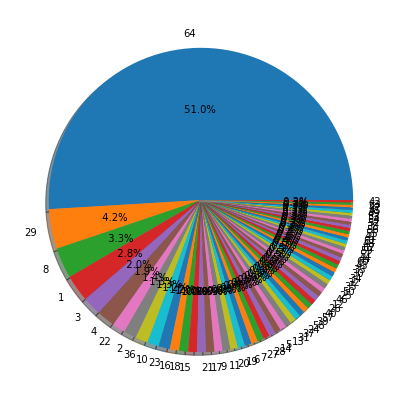

In [767]:
data = train_label.set_index('acc_id').loc[~np.isin(train_label['acc_id'], merchant_or_end)]

plt.figure(figsize=(10, 7), facecolor='w')
plt.pie(x=data['survival_time'].value_counts().values,
        labels=data['survival_time'].value_counts().index,
        shadow=True, autopct="%5.1f%%")
plt.show()

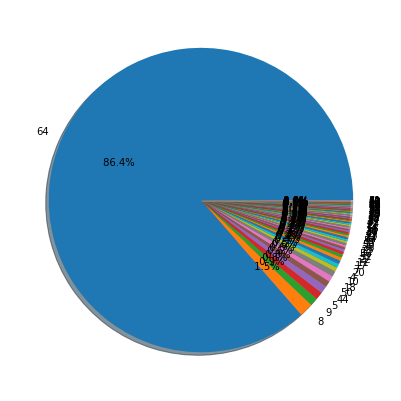

In [743]:
data = train_label.set_index('acc_id').loc[merchant_or_end]

plt.figure(figsize=(10, 7), facecolor='w')
plt.pie(x=data['survival_time'].value_counts().values,
        labels=data['survival_time'].value_counts().index,
        shadow=True, autopct="%5.1f%%")
plt.show()

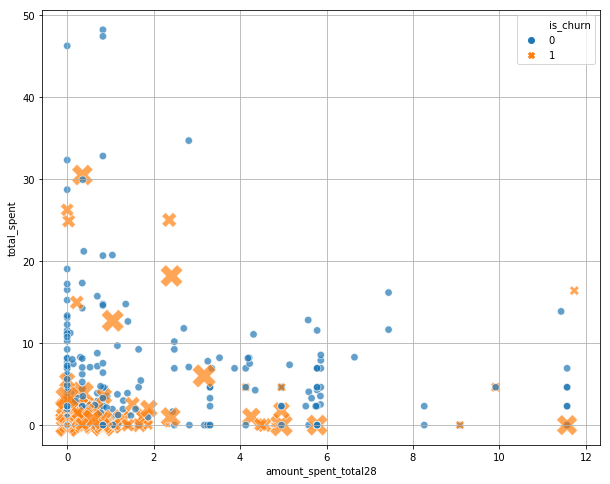

In [751]:
# Scatter plot by Groups
data = p.set_index('acc_id').loc[merchant_or_end]
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x='amount_spent_total28', 
                y='total_spent', 
                hue='is_churn', # different colors by group
                style='is_churn', # different shapes by group
                s= data['survival_time'] * 10 + 5, # marker size
                alpha=.7,
                data=p.set_index('acc_id').loc[merchant_or_end])
plt.grid(True)
plt.show()

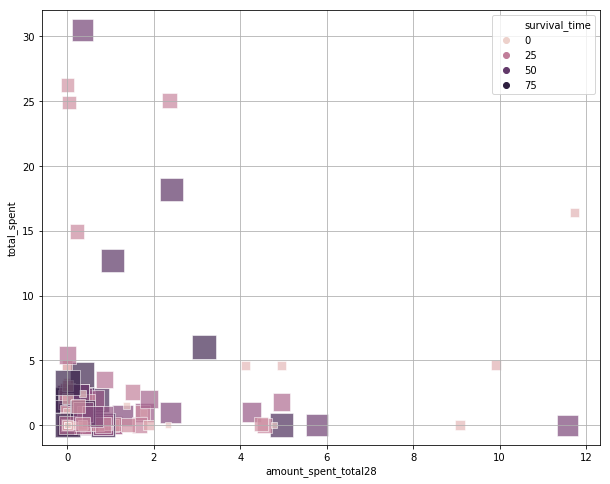

In [753]:
# Scatter plot by Groups
data = p.set_index('acc_id').loc[merchant_or_end]
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x='amount_spent_total28', 
                y='total_spent', 
                hue='survival_time', # different colors by group
                s= data[data['is_churn'] == 1]['survival_time'] * 10 + 5, # marker size
                alpha=.7, marker='s',
                data=data[data['is_churn'] == 1])
plt.grid(True)
plt.show()

In [768]:
train_trade

,day,type,server,source_acc_id,source_char_id,target_acc_id,target_char_id,item_type,item_amount,item_price,hour,minute,second
312052,1,0,as,104177,163760,50138,388244,etc,8.868841e-07,2.994625,00,00,00
49265,1,1,ag,22181,330660,97774,378791,adena,1.893617e+00,NaN,00,00,01
97977,1,1,ag,97774,378791,22181,330660,etc,1.143361e-05,NaN,00,00,01
127986,1,1,aq,74334,355483,87174,389623,adena,1.198492e-02,NaN,00,00,01
157271,1,1,ag,97774,378791,22181,330660,accessory,2.396984e-08,NaN,00,00,01
368128,1,0,ad,69422,290193,121023,37066,etc,7.190952e-06,0.947435,00,00,01
65406,1,0,ay,113254,80812,70315,348196,etc,7.190952e-07,0.237123,00,00,03
189132,1,0,ar,89599,361649,70084,310022,etc,7.190952e-08,0.075670,00,00,03
46775,1,0,aa,28030,292301,62232,282678,etc,1.198492e-07,0.014229,00,00,04
66015,1,0,bd,104024,168847,102243,292557,etc,2.396984e-07,0.001085,00,00,05
